In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
vino = pd.read_excel('vino.xlsx')
vino.set_index('Wine Id', inplace=True)
vino.head(5)

,Title,Year,Winery,Variety,Colour,Description,Country,Province,Price,Points
Wine Id,,,,,,,,,,
0,Nicosia 2013 Vulkà Bianco (Etna),Nicosia 2013 Vulkà Bianco (Etna),Nicosia,White Blend,White,"Aromas include tropical fruit, broom, brimston...",Italy,Sicily & Sardinia,36,87
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,Portuguese Red,Red,"This is ripe and fruity, a wine that is smooth...",Portugal,Douro,15,87
2,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,Pinot Gris,White,"Tart and snappy, the flavors of lime flesh and...",US,Oregon,14,87
3,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,Riesling,White,"Pineapple rind, lemon pith and orange blossom ...",US,Michigan,13,87
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,Pinot Noir,Red,"Much like the regular bottling from 2012, this...",US,Oregon,65,87


In [3]:

vino['Year'] = vino.Year.str.extract('(\d+)', expand=True)

In [4]:
# Función para ponerle la caliad al vino, mediante sus puntos, en una nueva columna
def nuevafun(a):
   if a>=95 :
       return(" Excepcional")
   elif(a>=90) and (a< 95):
       return(" Excelente")
   elif(a>=80) and (a< 90):
       return(" Muy Bueno")
   else:
       return("No Compiten")


vino['Rank']= vino['Points'].apply(nuevafun)
vino.tail(5)

,Title,Year,Winery,Variety,Colour,Description,Country,Province,Price,Points,Rank
Wine Id,,,,,,,,,,,
118773,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,2013,Dr. H. Thanisch (Erben Müller-Burggraef),Riesling,White,Notes of honeysuckle and cantaloupe sweeten th...,Germany,Mosel,28,90,Excelente
118774,Citation 2004 Pinot Noir (Oregon),2004,Citation,Pinot Noir,Red,Citation is given as much as a decade of bottl...,US,Oregon,75,90,Excelente
118775,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,2013,Domaine Gresser,Gewürztraminer,Rose,Well-drained gravel soil gives this wine its c...,France,Alsace,30,90,Excelente
118776,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),2012,Domaine Marcel Deiss,Pinot Gris,White,"A dry style of Pinot Gris, this is crisp with ...",France,Alsace,32,90,Excelente
118777,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,2012,Domaine Schoffit,Gewürztraminer,Rose,"Big, rich and off-dry, this is powered by inte...",France,Alsace,21,90,Excelente


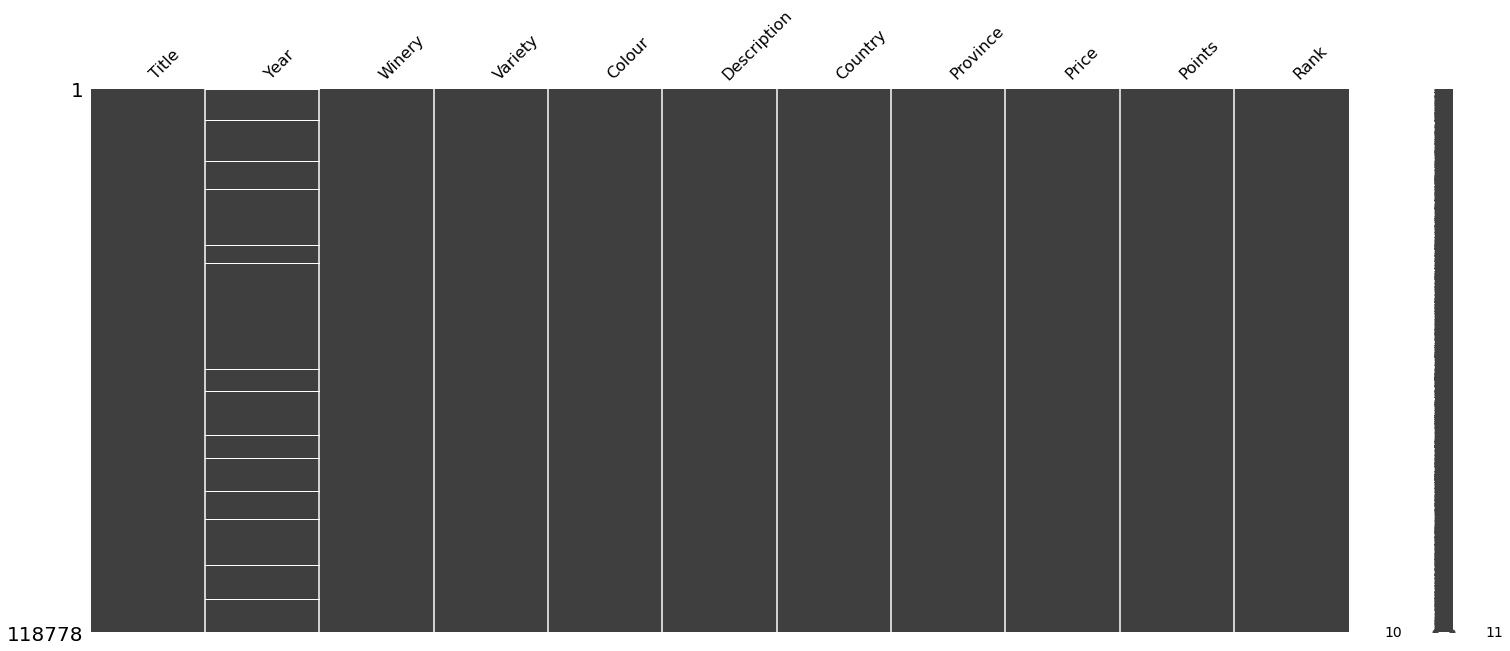

In [5]:
import numpy as np
import pandas as pd
import missingno as msno

def matrix(df,
           n=0, p=0,
           figsize=(25, 10), width_ratios=(15, 1), color=(0.25, 0.45, 0.6),
           fontsize=16, sparkline=True, inline=False):
    df = nullity_filter(df, filter=filter, n=n, p=p)
    df = nullity_sort(df, sort=sort, axis='columns')
    height = df.shape[0]
    width = df.shape[1]
    z = df.notnull().values
    g = np.zeros((height, width, 3), dtype=np.float32)
    g[z < 0.5] = [1, 1, 1]
    g[z > 0.5] = color

msno.matrix(vino);

In [6]:
vino.isnull().sum().sum()

3300

In [7]:
vino['Year'].fillna(vino['Year'].mode()[0], inplace=True)

In [8]:
vino.isnull().sum().sum()

4

In [9]:
vino =vino.dropna()

In [10]:
vino.isnull().sum().sum()

0

In [11]:
countries = vino['Country'].unique()
print(countries)
len(countries)

['Italy' 'Portugal' 'US' 'Spain' 'France' 'Germany' 'Chile' 'Australia'
 'Austria' 'South Africa' 'New Zealand' 'Argentina' 'Israel' 'Greece'
 'Romania' 'Hungary' 'Mexico' 'Canada' 'Czech Republic' 'Turkey'
 'Luxembourg' 'Croatia' 'Uruguay' 'Lebanon' 'Serbia' 'Georgia' 'Brazil'
 'Slovenia' 'Morocco' 'Peru' 'India' 'Bulgaria' 'Cyprus' 'Armenia'
 'Moldova' 'England' 'Switzerland' 'Bosnia and Herzegovina' 'Ukraine'
 'Slovakia' 'Macedonia' 'China' 'Egypt']


43

In [12]:
variedad = vino['Variety'].unique()
len(variedad)

697

In [13]:
province = vino['Province'].unique()
len(province)

425

In [14]:
winery = vino['Winery'].unique()
len(winery)

16744

In [15]:
# Vinos con precio <= 25
vinos_25 = vino.loc[vino['Price']<= 25]


In [16]:
# Vinos que su precio es > 25 y <= 50
vinos_50 = vino[(25 < vino['Price']) & (vino['Price'] <= 50)]

In [17]:
# Vinos que su precio es > 50 y <= 100
vinos_100 = vino[(50 < vino['Price']) & (vino['Price'] <= 100)]

In [18]:
# Definir lista de palabras de conexión y redundantes 

stopwords1= ["it's","yet","i", "me", "my", "myself", "we", "our", "ours", "ourselves",
             "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself",
             "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
             "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
             "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has",
             "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if",
             "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
             "against", "between", "into", "through", "during", "before", "after", "above", "below",
             "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further",
             "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both",
             "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own",
             "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

stopwords2 = ["show","hints","great","rich","offers","alongside","notes", "wine","drink","wine.","flavors",
              "aromas","finish","palate","black","finish.","flavors.","tastes",'mouth','fruit','tannin','acidity',
              'nose','well','sauvignon','pinot','noir','merlot','juicy','texture','cabernet','richness',
              'chardonay','shows','fruits','bright','full','firm','touch','structure','tannins']
stopwords_total= stopwords1+ stopwords2

In [19]:
# Prueba buscando palabras

#Nos quedamos sólo con la columna description

descriptions = vino.Description

# Unimos toda la columna en un texto
descriptions1 = vino['Description'].str.lower().str.cat(sep=' ')
descriptions2 = descriptions1.replace(",", " ")
descriptions3 = descriptions2.replace("."," ")

#Convertimos el texto en una lista de palabras separadas

descriptions4 =descriptions3.split()


#Eliminamos las palabras de conexión y palabras comunes

descriptions5= filter(lambda w: not w in stopwords_total,descriptions4)
descriptions6=list(descriptions5)

#50 palabras más frecuentes 
from collections import Counter
Counter = Counter(descriptions6) 
most_occur = Counter.most_common(50)

#Convertir lista  Data frame

most_occur = pd.DataFrame(most_occur,columns=['Word', 'Frequency'])
most_occur.head(50)

,Word,Frequency
0,cherry,25026
1,ripe,24450
2,spice,17189
3,red,17114
4,fresh,15295
5,oak,15279
6,berry,14181
7,dry,14061
8,plum,12874
9,soft,12334


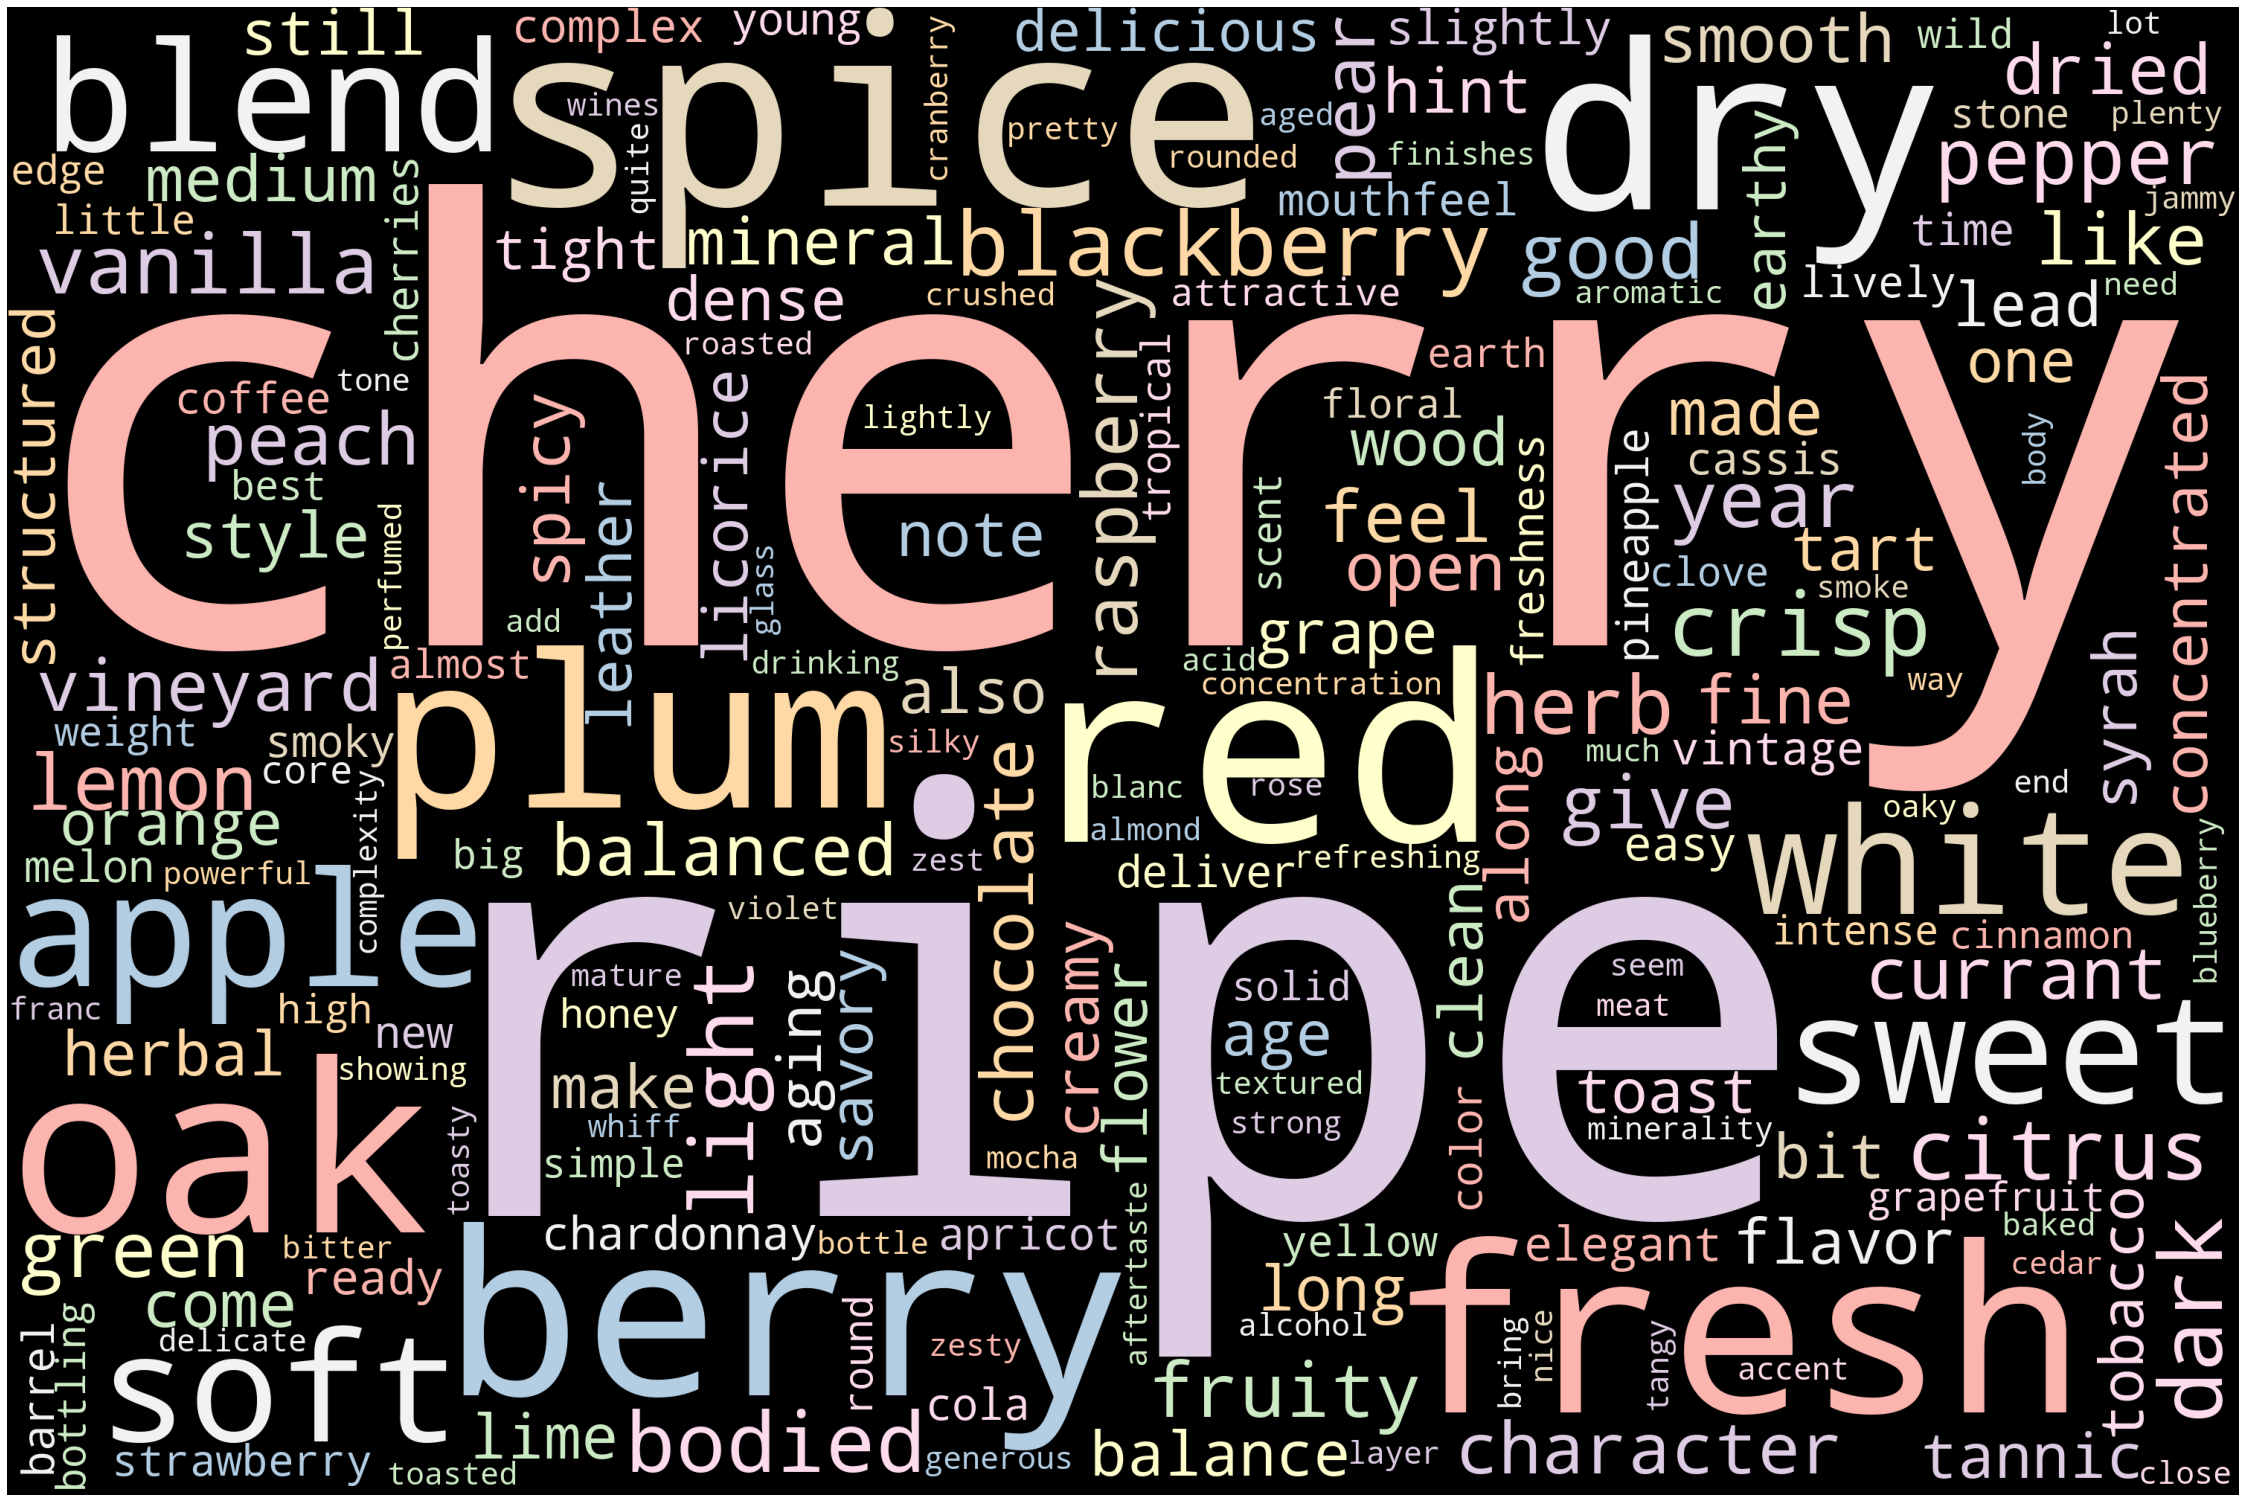

In [20]:
from wordcloud import WordCloud

# Definir funcion  plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
# Generate word cloud
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      random_state=1,
                      background_color='black',
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = stopwords_total).generate(descriptions3)
# Plot
plot_cloud(wordcloud)

In [21]:
#Prueba recomendador

#Nos quedamos sólo con la columna description

#descriptions = vino.description
sabores = ['cherry','spice','apple','sweet','fresh',
           'strawberry','cinnamon','herb','oak','vanilla',
           'dry','plum','character','soft']

variedad = vino['Variety'].unique()

mi_lista=[]
for variety in variedad:
    tipo_vino = vino.loc[vino['Variety']== variety]   
    descriptions = tipo_vino['Description'].str.lower().str.cat(sep=' ')
    descriptions = descriptions.replace(",", " ")
    descriptions = descriptions.replace("."," ")
    descriptions = descriptions.split()
    
    descriptions = filter(lambda w: w in sabores, descriptions)
                    
    descriptions = list(descriptions)
    
    descriptions =  " ".join(descriptions)
    
    mi_lista.append(descriptions)

In [22]:
mi_lista[0]

'herb apple apple vanilla oak spice spice apple vanilla herb vanilla fresh plum fresh plum apple fresh fresh fresh character spice dry apple herb spice sweet apple apple vanilla sweet vanilla sweet sweet fresh spice soft fresh vanilla apple character dry spice oak character apple character apple fresh apple fresh soft herb soft apple oak soft spice sweet apple vanilla sweet character character dry herb apple apple apple fresh apple soft sweet apple oak dry apple vanilla apple dry apple apple vanilla spice apple sweet vanilla herb soft vanilla soft oak apple oak fresh fresh fresh herb vanilla apple apple dry soft vanilla fresh fresh fresh fresh apple soft sweet apple fresh soft soft vanilla fresh vanilla apple apple apple fresh sweet character dry fresh apple spice character fresh oak dry apple fresh apple spice apple herb character apple herb vanilla oak dry fresh sweet fresh dry fresh sweet apple dry oak fresh sweet cinnamon sweet dry apple spice sweet vanilla apple oak apple vanilla 

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
# ln(N+1/df+1) +1


test = TfidfVectorizer()
matriz_tfidf = test.fit_transform(mi_lista)
print(test.idf_)
print(test.get_feature_names())

[1.96848928 1.96848928 1.94610028 2.57148536 1.85785965 1.55675456
 2.21550031 2.01879002 1.9242016  1.69601662 1.60804785 2.55100683
 1.783028   1.8344863 ]
['apple', 'character', 'cherry', 'cinnamon', 'dry', 'fresh', 'herb', 'oak', 'plum', 'soft', 'spice', 'strawberry', 'sweet', 'vanilla']


In [24]:
col = test.get_feature_names()
col

['apple',
 'character',
 'cherry',
 'cinnamon',
 'dry',
 'fresh',
 'herb',
 'oak',
 'plum',
 'soft',
 'spice',
 'strawberry',
 'sweet',
 'vanilla']

In [25]:
val =matriz_tfidf.A # clastering por filas 
val

array([[0.69942465, 0.13435985, 0.00868992, ..., 0.00650915, 0.30254675,
        0.24340556],
       [0.00398051, 0.51215885, 0.04591109, ..., 0.02923108, 0.1309993 ,
        0.03462237],
       [0.6399477 , 0.09643048, 0.01213338, ..., 0.0159048 , 0.22233343,
        0.11437499],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.46396418, ..., 0.        , 0.        ,
        0.        ]])

In [26]:
import openpyxl

vino_var_sab = pd.DataFrame(val, index=variedad, columns= col)



vino_var_sab.to_excel("vino_var_sab.xlsx")

In [27]:
from sklearn.cluster import KMeans # Importing KMeans
# Creating an instance of KMeans to find 6 clusters
kmeans_1 = KMeans(n_clusters=6)
# Using fit_predict to cluster the dataset
X = vino_var_sab[['apple','strawberry','character','oak',
                  'cherry','cinnamon','dry','fresh','herb','plum',
                  'soft','spice','sweet','vanilla']].values
predictions = kmeans_1.fit_predict(X)

In [28]:
clustered = pd.concat([vino_var_sab.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)

In [29]:
clustered.head(20)

#clustered.sort_values(by=['Cluster'])

,index,apple,character,cherry,cinnamon,dry,fresh,herb,oak,plum,soft,spice,strawberry,sweet,vanilla,Cluster
0,White Blend,0.699425,0.134360,0.008690,0.029526,0.212138,0.411124,0.118715,0.193168,0.020867,0.172020,0.213361,0.006509,0.302547,0.243406,5
1,Portuguese Red,0.003981,0.512159,0.045911,0.006933,0.401978,0.262328,0.017920,0.073480,0.312573,0.507572,0.353347,0.029231,0.130999,0.034622,1
2,Pinot Gris,0.639948,0.096430,0.012133,0.125969,0.498079,0.417355,0.039466,0.100693,0.013711,0.125380,0.229159,0.015905,0.222333,0.114375,5
3,Riesling,0.522058,0.083475,0.032564,0.014736,0.660932,0.365047,0.061956,0.009718,0.046753,0.075808,0.136381,0.003508,0.343721,0.022287,5
4,Pinot Noir,0.013534,0.104853,0.781603,0.129656,0.221118,0.133486,0.085443,0.321320,0.189324,0.167811,0.192022,0.239505,0.126961,0.097425,4
5,Tempranillo-Merlot,0.000000,0.000000,0.502344,0.000000,0.239783,0.100461,0.000000,0.130277,0.745037,0.109448,0.207542,0.000000,0.230125,0.000000,3
6,Frappato,0.033116,0.033116,0.687523,0.086520,0.031255,0.288081,0.111814,0.067924,0.032371,0.057064,0.378730,0.514986,0.059992,0.000000,4
7,Gewürztraminer,0.180054,0.209252,0.004811,0.031785,0.532770,0.292484,0.016431,0.024953,0.042812,0.205445,0.512811,0.000000,0.487068,0.090701,2
8,Tempranillo Blend,0.007216,0.048105,0.337664,0.034563,0.188418,0.123642,0.064970,0.402077,0.717103,0.051809,0.251501,0.056107,0.071896,0.277950,3
9,Meritage,0.000000,0.048076,0.641645,0.020934,0.279807,0.063367,0.081163,0.567002,0.203642,0.241625,0.170183,0.041535,0.174186,0.119476,4


In [30]:
kmeans_1.inertia_

260.7019481426511

In [31]:
kmeans_1.score(X)

-260.7019481426511

In [32]:
vinoII = clustered.loc[clustered['Cluster']==2]
vinoII.head(60)


,index,apple,character,cherry,cinnamon,dry,fresh,herb,oak,plum,soft,spice,strawberry,sweet,vanilla,Cluster
7,Gewürztraminer,0.180054,0.209252,0.004811,0.031785,0.532770,0.292484,0.016431,0.024953,0.042812,0.205445,0.512811,0.000000,0.487068,0.090701,2
15,Viognier-Chardonnay,0.449110,0.449110,0.000000,0.000000,0.000000,0.177586,0.000000,0.000000,0.439005,0.000000,0.000000,0.000000,0.610195,0.000000,2
32,Petit Manseng,0.156037,0.156037,0.000000,0.067945,0.196357,0.534733,0.000000,0.320048,0.000000,0.044813,0.212443,0.000000,0.659568,0.193887,2
58,Moscato,0.105668,0.031700,0.020893,0.013804,0.074797,0.267411,0.118927,0.000000,0.005165,0.259469,0.043160,0.054775,0.890125,0.177254,2
70,Prosecco,0.235258,0.055355,0.027363,0.000000,0.391828,0.470598,0.015575,0.014192,0.000000,0.262310,0.056524,0.000000,0.701953,0.025793,2
87,Scheurebe,0.155684,0.000000,0.000000,0.000000,0.440803,0.492482,0.175219,0.000000,0.152181,0.134134,0.254354,0.000000,0.564064,0.290171,2
99,Sémillon,0.397968,0.104729,0.000000,0.164171,0.494214,0.215340,0.094296,0.386657,0.020474,0.108279,0.205325,0.027144,0.474308,0.273278,2
104,Verduzzo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2
112,Roussanne,0.349199,0.152775,0.000000,0.000000,0.556156,0.207120,0.171945,0.358122,0.000000,0.112824,0.231773,0.000000,0.415143,0.325428,2
123,Port,0.006392,0.556126,0.075835,0.008350,0.476607,0.204737,0.010792,0.022945,0.153087,0.228559,0.201039,0.028993,0.544260,0.044678,2


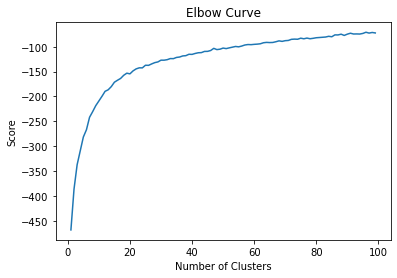

In [33]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 100
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X).score(X) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [34]:
clusterizacion = (clustered.groupby('Cluster').size())
print(clusterizacion)

Cluster
0    133
1    115
2     72
3    104
4    143
5    130
dtype: int64


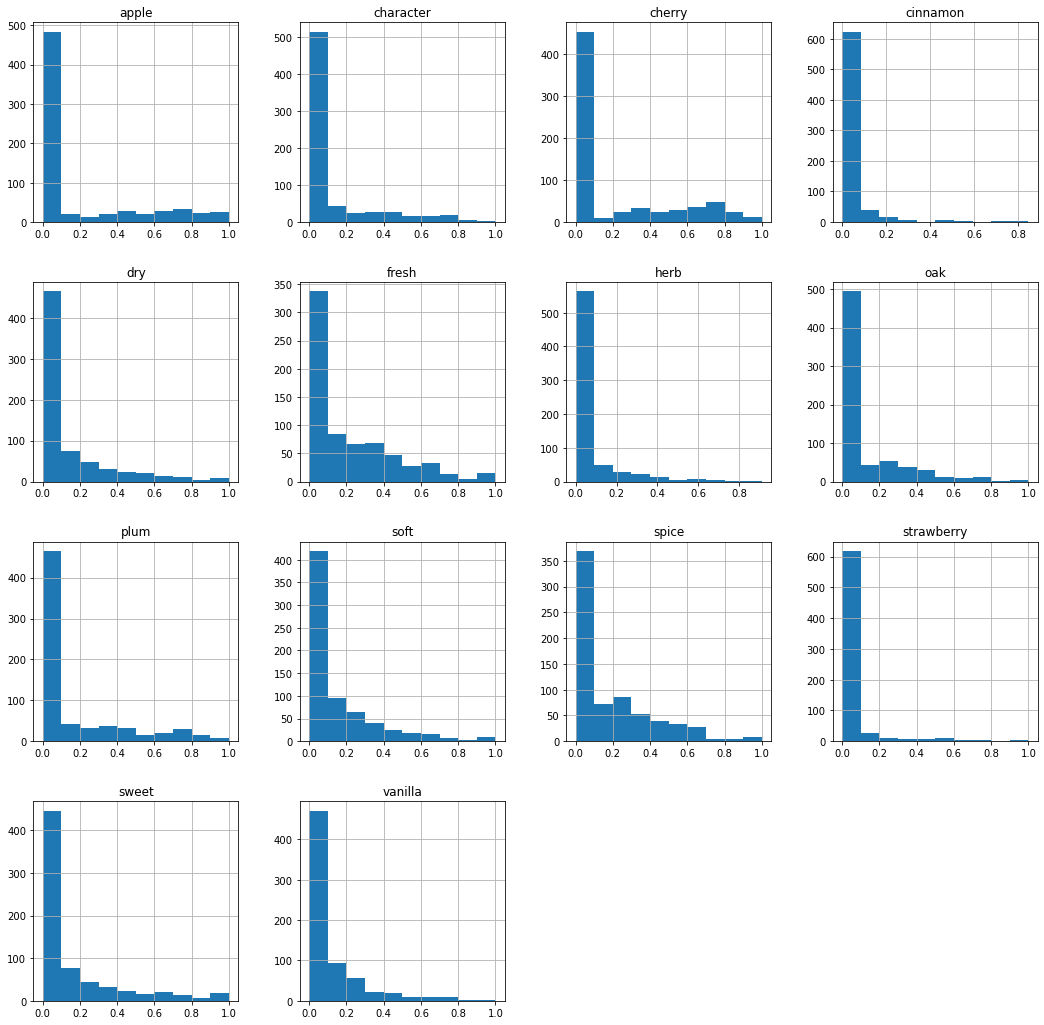

In [35]:
clustered.drop(['Cluster'],1).hist(figsize=(18, 18))
plt.show()
# Buenas gráficas para ver en que valores y cuanto inciden nuestras variables

In [36]:
X = np.array(clustered[["cherry","apple","sweet"]])
y = np.array(clustered['Cluster'])
X.shape

(697, 3)

In [37]:
import matplotlib as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d
from sklearn.cluster import DBSCAN
X = vino_var_sab[['apple','character','strawberry',
                  'cherry','cinnamon','dry','fresh','herb','plum',
                  'soft','spice','sweet','oak','vanilla']].values

dbscan = DBSCAN(algorithm='auto', eps=0.55, leaf_size=25, metric='euclidean',
                min_samples=2, n_jobs=-1)

#dbscan.fit(X)
preds = dbscan.fit_predict(X)

In [38]:
# Métricas de Clustering

# Nuesttro sihouette score (coeficiente de silueta) 

print(silhouette_score(X, preds))

# Nuestro harabasz score 

print(calinski_harabasz_score(X, preds))



-0.08911069948999509
5.617529498556776


In [39]:
Class = pd.concat([vino_var_sab.reset_index(), 
                       pd.DataFrame({'Cluster':preds})], 
                      axis=1)
Class.head()

,index,apple,character,cherry,cinnamon,dry,fresh,herb,oak,plum,soft,spice,strawberry,sweet,vanilla,Cluster
0,White Blend,0.699425,0.134360,0.008690,0.029526,0.212138,0.411124,0.118715,0.193168,0.020867,0.172020,0.213361,0.006509,0.302547,0.243406,0
1,Portuguese Red,0.003981,0.512159,0.045911,0.006933,0.401978,0.262328,0.017920,0.073480,0.312573,0.507572,0.353347,0.029231,0.130999,0.034622,0
2,Pinot Gris,0.639948,0.096430,0.012133,0.125969,0.498079,0.417355,0.039466,0.100693,0.013711,0.125380,0.229159,0.015905,0.222333,0.114375,0
3,Riesling,0.522058,0.083475,0.032564,0.014736,0.660932,0.365047,0.061956,0.009718,0.046753,0.075808,0.136381,0.003508,0.343721,0.022287,0
4,Pinot Noir,0.013534,0.104853,0.781603,0.129656,0.221118,0.133486,0.085443,0.321320,0.189324,0.167811,0.192022,0.239505,0.126961,0.097425,0


In [40]:
clusterz = (Class.groupby('Cluster').size())
print(clusterz)
# Demasiados puntos para el cluster 0
# Imposible encontrar una buena clusterización

Cluster
-1      35
 0     590
 1       3
 2       5
 3      40
 4       2
 5       3
 6       4
 7       2
 8       2
 9       3
 10      6
 11      2
dtype: int64


In [41]:
Class.loc[Class['Cluster']==3].head(20)


,index,apple,character,cherry,cinnamon,dry,fresh,herb,oak,plum,soft,spice,strawberry,sweet,vanilla,Cluster
212,Kinali Yapincak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
254,Carcajolu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
327,Siegerrebe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
336,Ekigaïna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
352,Barbera-Nebbiolo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
357,Piquepoul Blanc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
402,Prunelard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
404,Gros Plant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
430,Zelen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
455,Terrantez,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [64]:
vector=np.array([4,3,0,2,5,6,8,5,5,4,4,1,1,4])

In [65]:
multiplicación_de_matriz=matriz_tfidf.A*vector
multiplicación_de_matriz

array([[2.7976986 , 0.40307956, 0.        , ..., 0.00650915, 0.30254675,
        0.97362224],
       [0.01592204, 1.53647655, 0.        , ..., 0.02923108, 0.1309993 ,
        0.13848949],
       [2.55979082, 0.28929143, 0.        , ..., 0.0159048 , 0.22233343,
        0.45749997],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [66]:
salida = np.sum(multiplicación_de_matriz, axis=1)
print(salida)

[11.63135963 10.96614167 11.09717867  9.92620624  7.96677706  7.67633158
  6.00375055 10.02346723 10.49494708  8.8087233   8.95689069  6.78636452
 10.32437008  7.64159288 12.99056803  7.01450862 10.27521333  8.95345011
 11.20649176  9.78164133 10.61842981 10.85287184 11.23004061  7.48658103
  9.48501781 12.15192912 10.53733103  7.84974021 10.07551465 10.12551326
 11.17643799  8.11872647  9.48271104  9.29836798  9.78984426 10.01273665
  6.2947889  11.64205453 12.06634328 12.21401844 10.86743621 11.44854259
  7.28060197 10.21617392 11.29377032  9.99056776  8.31642316  9.24146449
 10.50448186  9.8649118  12.69572821  6.1032671   9.91954693  6.07936733
  8.69634712  9.15730812 10.08248914  7.18498728  6.36550498  8.5553222
  9.60578521  8.4797124   7.87676227 10.85765506  8.13135     6.68868871
  8.67063982  7.86168483 10.75812502 10.31356735  8.16585072  6.32902153
  9.78149945 10.07801234  8.51366679 10.98278683  9.88191158 10.44900568
  7.3514216   8.28478437  8.88635984 11.8863532   9.

In [67]:
index_max= np.argmax(salida)
index_max

148

In [68]:
Varie=variedad[index_max]
Varie

'Sauvignon Blanc-Semillon'

In [75]:

reco_wine = vino.loc[vino['Variety'] == Varie]
reco_wine.iloc[0:2].Title 

Wine Id
1366    Xanadu 2015 Exmoor Sauvignon Blanc-Semillon (M...
2550    DeLille 2011 Chaleur Estate Blanc Sauvignon Bl...
Name: Title, dtype: object